## Download data

We illustrate the usage of LOG-TRAM by applying it to the GWAS summary statistics of T2D from BBJ male and UKBB with 1 Mbp non-overlapping sliding windows as local regions. The GWAS datasets and LDscores files involved in the following example are availabel from [here](https://www.dropbox.com/sh/9asugdlu1lbal8o/AAB0martsgaBoR8B4hq2pc25a?dl=0)

## Run LOG-TRAM

Once the input files are formatted, LOG-TRAM will automatically preprocess the datasets, including SNPs overlapping and minor allele matching. It takes 8 mins to run the following meta-analysis for the whole genome (computing environment: 20 CPU cores of Intel(R) Xeon(R) Gold 6230N CPU @ 2.30GHz processor, 1TB of memory, and a 22 TB solid-state disk). 

In [ ]:
python <install path>/src/LOG-TRAM.py \
        --out T2D_meta \
        --sumstats-popu1 T2D_harmonized_pop1_UKB.txt,T2D_UKB \
        --sumstats-popu2 T2D_harmonized_pop2_BBJ.txt,T2D_BBJ \
        --ldscores ./LDscoresEUR-EAS/ldsc_annot_EUR_EAS_1mb_TGP_hm3_chr@_std

LOG-TRAM will output two meta-analysis files, corresponding to EAS and EUR respectively. LOG-TRAM will add the inputed phenotype name after `--out` argument automatically. Usually, we focus on the under-represented populations such as `T2D_meta_TRAM_pop2_T2D_BBJ.txt` for EAS.

## Visualize results

In [1]:
import pandas as pd
import numpy as np

In [13]:
eas_gwas = pd.read_csv('T2D_harmonized_pop2_BBJ.txt',sep='\t')
eas_meta = pd.read_csv('T2D_meta_TRAM_pop2_T2D_BBJ.txt',sep='\t')

In [14]:
eas_gwas

,CHR,BP,SNP,A1,A2,FRQ,BETA,SE,Z,P,N
0,1,752566,rs3094315,G,A,0.842470,0.003771,0.005893,0.639831,0.522282,108479
1,1,760912,rs1048488,C,T,0.842798,0.003927,0.005898,0.665848,0.505508,108479
2,1,761147,rs3115850,T,C,0.842210,0.003923,0.005889,0.666066,0.505369,108479
3,1,846808,rs4475691,C,T,0.141431,-0.001404,0.006161,-0.227940,0.819693,108479
4,1,861808,rs13302982,A,G,0.540762,-0.000178,0.004308,-0.041337,0.967027,108479
...,...,...,...,...,...,...,...,...,...,...,...
1105171,22,51162059,rs10451,G,A,0.398167,0.003415,0.004386,0.778646,0.436188,108479
1105172,22,51163138,rs715586,C,T,0.067034,-0.005914,0.008585,-0.688862,0.490910,108479
1105173,22,51165664,rs8137951,G,A,0.394080,0.003479,0.004394,0.791877,0.428432,108479
1105174,22,51171497,rs2301584,G,A,0.249271,0.003774,0.004963,0.760520,0.446944,108479


In [15]:
eas_meta
# N is the original GWAS sample size
# N_eff is the computed effective sample size
# N_eff should be larger than N as LOG-TRAM can brorrow information from the large-scale auxiliary dataset.

,CHR,BP,SNP,A1,A2,FRQ,BETA,SE,Z,P,N,N_eff
0,1,752566,rs3094315,G,A,0.842470,0.003821,0.005915,0.645991,0.518285,108479,140998.977589
1,1,760912,rs1048488,C,T,0.842798,0.003993,0.005920,0.674491,0.499999,108479,140998.977589
2,1,761147,rs3115850,T,C,0.842210,0.003987,0.005911,0.674420,0.500044,108479,140998.977589
3,1,846808,rs4475691,C,T,0.141431,-0.001356,0.006184,-0.219347,0.826380,108479,140998.977589
4,1,861808,rs13302982,A,G,0.540762,-0.000074,0.004324,-0.017000,0.986437,108479,140998.977589
...,...,...,...,...,...,...,...,...,...,...,...,...
985520,22,51162059,rs10451,G,A,0.398167,0.003415,0.004386,0.778646,0.436188,108479,140998.977589
985521,22,51163138,rs715586,C,T,0.067034,-0.005914,0.008585,-0.688862,0.490910,108479,140998.977589
985522,22,51165664,rs8137951,G,A,0.394080,0.003479,0.004394,0.791877,0.428432,108479,140998.977589
985523,22,51171497,rs2301584,G,A,0.249271,0.003774,0.004963,0.760520,0.446944,108479,140998.977589


In [16]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
style.use('seaborn-white')
import seaborn as sns
import matplotlib as mpl
import sys  
sys.path.append('../src')
from plots import *

### QQ-plot

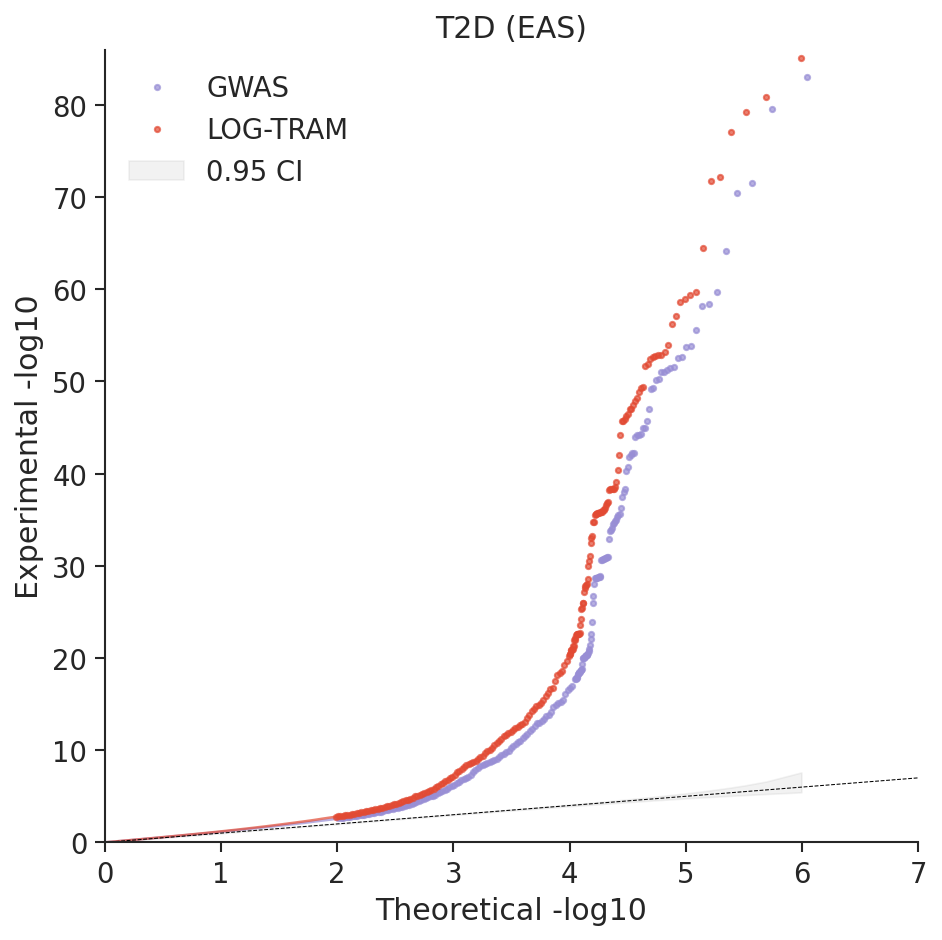

In [17]:
sns.set_context('paper',font_scale=1.5) 
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7,7
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
fig, ax = plt.subplots(1,1)
qqplot([eas_gwas['P'],eas_meta['P']], 
       ['GWAS','LOG-TRAM'], 
       color=['C2', 'C0', 'C2', 'C3', 'C4', 'C5'],
       shape=['.','.'],
       error_type='theoretical', 
       distribution='beta',
       n_quantiles = 200,
       ms=5,
       title='T2D (EAS)',ax=ax)

### Manhatton plot

In [7]:
# identify lead SNPs from GWAS summary statistics
def add_locus(gwas):
    gwas_sig = gwas.loc[gwas['P']<=5e-8].reset_index(drop=True)
    loci = []
    c = 0
    bp = -1
    l = -1
    for row in gwas_sig.iterrows():
        if c!=row[1]['CHR'] or row[1]['BP']-bp>1000000:
            c = row[1]['CHR']
            bp = row[1]['BP']
            l += 1
        loci.append(l)
    gwas_sig['loci'] = loci
    gwas_sig = gwas_sig.loc[gwas_sig.groupby('loci')['P'].idxmin()].reset_index(drop=True)
    return gwas_sig

In [8]:
# maximum p-vaule = 1e-30
threshold = 1e-30
eas_gwas.loc[eas_gwas['P']<threshold,'P'] = threshold
eas_meta.loc[eas_meta['P']<threshold,'P'] = threshold

In [9]:
eas_gwas_sig = add_locus(eas_gwas)
eas_meta_sig = add_locus(eas_meta)

0

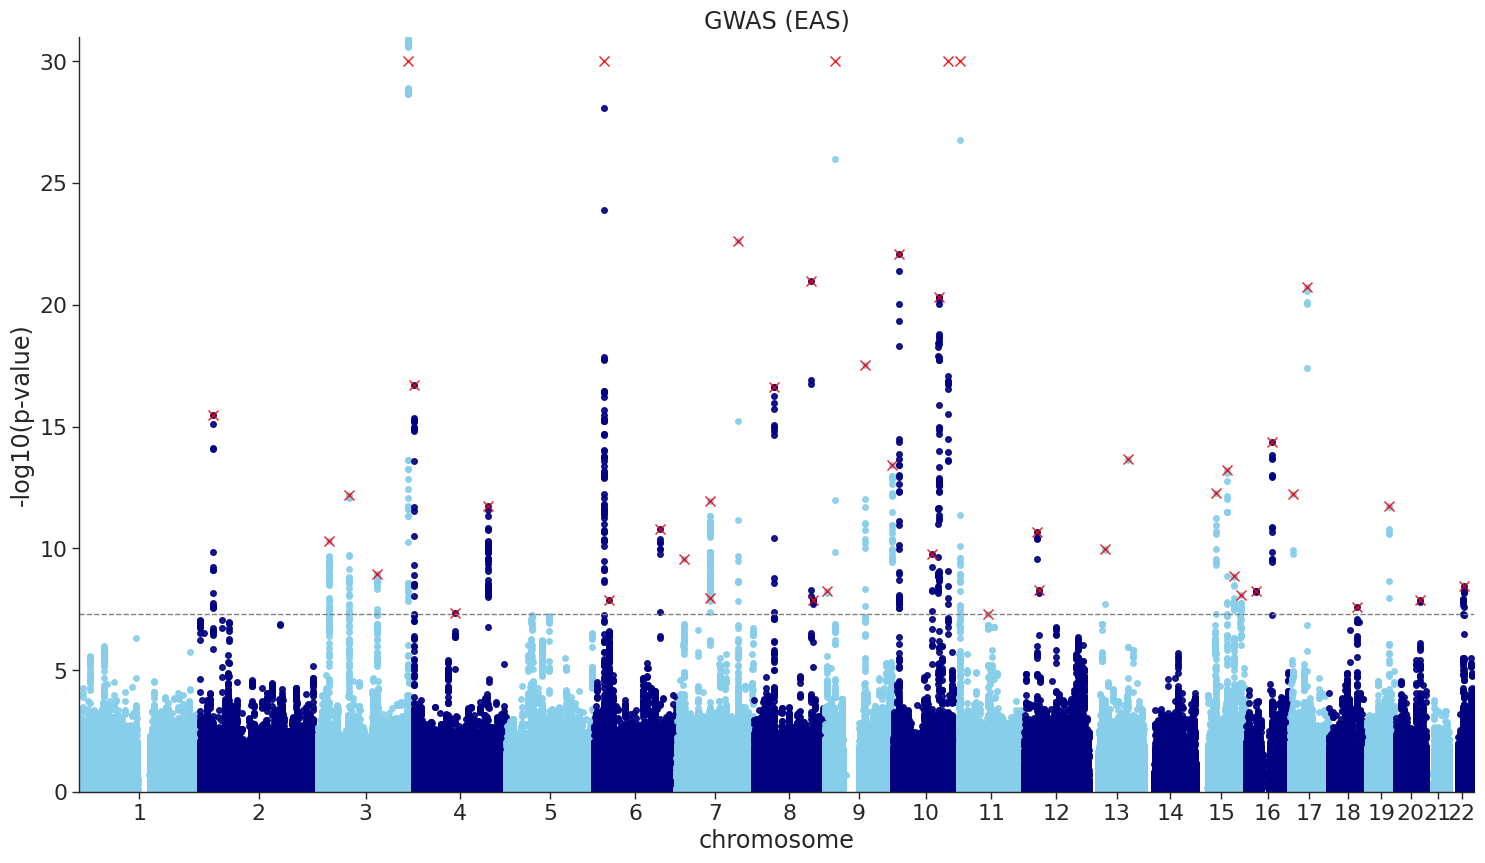

In [18]:
sns.set_context('paper',font_scale=1.8)
chrs = [str(i) for i in range(1,23)]
chrs_names = np.array([str(i) for i in range(1,23)])
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=18, 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
colors = ['skyblue','#000080']*11
manhattan(eas_gwas['P'], eas_gwas['BP'], eas_gwas['CHR'].astype(str), '',
          p2=eas_gwas_sig['P'], pos2=eas_gwas_sig['BP'], chr2=eas_gwas_sig['CHR'].astype(str), label2='',
       plot_type='single',
       chrs_plot=[str(i) for i in range(1,23)],
       chrs_names=chrs_names,
       cut = 0,
       title='{}'.format('GWAS (EAS)'),
       xlabel='chromosome',
       ylabel='-log10(p-value)',
       lines= [7.3],
       lines_styles = ['--'],
       top1=31,
       top2=31,
       lines_colors=['grey'],
       colors = colors,
       scaling = '-log10',alpha=0.9)

0

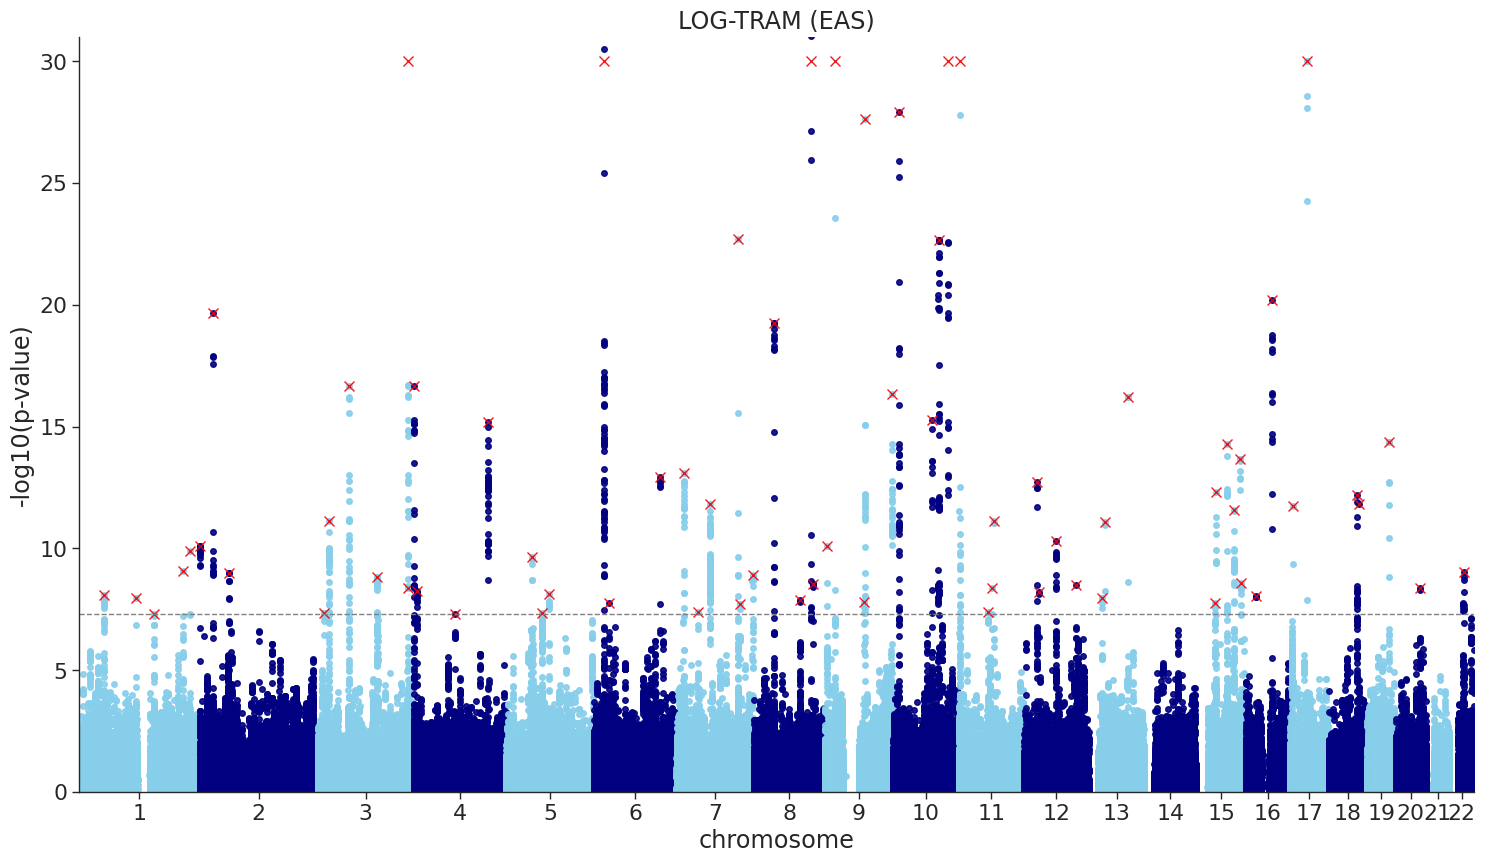

In [19]:
sns.set_context('paper',font_scale=1.8)
chrs = [str(i) for i in range(1,23)]
chrs_names = np.array([str(i) for i in range(1,23)])
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=18, 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
colors = ['skyblue','#000080']*11
manhattan(eas_meta['P'], eas_meta['BP'], eas_meta['CHR'].astype(str), '',
          p2=eas_meta_sig['P'], pos2=eas_meta_sig['BP'], chr2=eas_meta_sig['CHR'].astype(str), label2='',
       plot_type='single',
       chrs_plot=[str(i) for i in range(1,23)],
       chrs_names=chrs_names,
       cut = 0,
       title='{}'.format('LOG-TRAM (EAS)'),
       xlabel='chromosome',
       ylabel='-log10(p-value)',
       lines= [7.3],
       lines_styles = ['--'],
       top1=31,
       top2=31,
       lines_colors=['grey'],
       colors = colors,
       scaling = '-log10',alpha=0.9)